##### Copyright 2024 Google LLC.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Model tuning with Python

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://ai.google.dev/gemini-api/docs/model-tuning/python"><img src="https://ai.google.dev/static/site-assets/images/docs/notebook-site-button.png" height="32" width="32" />View on ai.google.dev</a>
  </td>
    <td>
    <a target="_blank" href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/model-tuning/python.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/model-tuning/python.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In this notebook, you'll learn how to get started with the tuning service using the Python client library for the Gemini API. Here, you'll learn how to tune the text model behind the Gemini API's text generation service.

## Setup

### Install the client library

In [40]:
!pip install -q google-generativeai

### Import libraries

In [41]:
import google.generativeai as genai

In [42]:
from google.colab import userdata
genai.configure(api_key=userdata.get('GOOGLE_API_KEY'))

You can check you existing tuned models with the `genai.list_tuned_model` method.

In [43]:
for i, m in zip(range(5), genai.list_tuned_models()):
  print(m.name)

tunedModels/generate-num-4913
tunedModels/generate-num-5302
tunedModels/generate-num-5849
tunedModels/polio-awareness-tuned-model-4751


## Create tuned model

To create a tuned model, you need to pass your dataset to the model in the `genai.create_tuned_model` method. You can do this be directly defining the input and output values in the call or importing from a file into a dataframe to pass to the method.

For this example, you will tune a model to generate the next number in the sequence. For example, if the input is `1`, the model should output `2`. If the input is `one hundred`, the output should be `one hundred one`.

In [44]:
base_model = [
    m for m in genai.list_models()
    if "createTunedModel" in m.supported_generation_methods and
    "flash" in m.name][0]
base_model

Model(name='models/gemini-1.5-flash-001-tuning',
      base_model_id='',
      version='001',
      display_name='Gemini 1.5 Flash 001 Tuning',
      description=('Version of Gemini 1.5 Flash that supports tuning, our fast and versatile '
                   'multimodal model for scaling across diverse tasks, released in May of 2024.'),
      input_token_limit=16384,
      output_token_limit=8192,
      supported_generation_methods=['generateContent', 'countTokens', 'createTunedModel'],
      temperature=1.0,
      max_temperature=2.0,
      top_p=0.95,
      top_k=64)

In [45]:
import random

name = f'polio-awareness-tuned-model-{random.randint(0,10000)}'
operation = genai.create_tuned_model(
    # You can use a tuned model here too. Set `source_model="tunedModels/..."`
    source_model=base_model.name,
    training_data=[
        {
             'text_input': 'What are the symptoms of polio?',
             'output': 'Polio symptoms can range from mild flu-like symptoms to severe paralysis.  Common symptoms include fever, fatigue, headache, stiffness in the neck and back, and muscle pain.  Paralysis is the most serious symptom and can be permanent.',
        },{
             'text_input': 'How can polio be prevented?',
             'output': 'Polio is preventable through vaccination.  The polio vaccine is safe and effective.  Ensure you and your family are fully vaccinated against polio.',
        },{
             'text_input': 'Is polio still a problem?',
             'output': 'While polio has been eradicated in many parts of the world, it is still present in some countries.  Vaccination efforts are crucial to prevent its spread and eliminate it globally.',
        },{
             'text_input': 'What is the role of vaccination in eradicating polio?',
             'output': 'Vaccination is the primary tool for eradicating polio.  By vaccinating a large percentage of the population, we can interrupt the transmission of the virus and protect individuals from the disease.',
        },{
             'text_input': 'Where can I get vaccinated against polio?',
             'output': 'You can get vaccinated against polio at your local doctors office, health clinic, or public health department.  Contact your healthcare provider for more information.',
        },{
             'text_input': 'What are the long-term effects of polio?',
             'output': 'Even after recovering from polio, some individuals may experience long-term effects such as muscle weakness, pain, and post-polio syndrome.  Ongoing medical care and support can help manage these symptoms.',
        },{
             'text_input': 'Why is it important to continue polio vaccination efforts?',
             'output': 'It is vital to continue polio vaccination efforts until the disease is completely eradicated worldwide.  Stopping vaccination prematurely could allow the virus to resurge and cause new outbreaks.',
        },{
             'text_input': 'How does polio spread?',
             'output': 'Polio spreads through person-to-person contact, usually through fecal-oral transmission. It can also spread through contaminated food or water. Practicing good hygiene is important to prevent the spread of polio.',
        },{
             'text_input': 'Who is most at risk of polio?',
             'output': 'Unvaccinated individuals, especially children, are most at risk of polio. Travelers to countries where polio is still circulating are also at risk if they are not vaccinated.',
        },{
             'text_input': 'What is the Global Polio Eradication Initiative?',
             'output': 'The Global Polio Eradication Initiative (GPEI) is a public-private partnership led by national governments, WHO, Rotary International, CDC, UNICEF, the Bill & Melinda Gates Foundation, and others. Its goal is to eradicate polio worldwide.',
        },{
            'text_input': 'What should I do if I suspect someone has polio?',
            'output': 'If you suspect someone has polio, seek immediate medical attention. Early diagnosis and treatment are crucial for managing the disease and preventing complications.'
        },{
            'text_input': 'How does the polio vaccine work?',
            'output': 'The polio vaccine works by stimulating the body s immune system to produce antibodies that fight against the poliovirus. This provides protection against infection and paralysis.'
        },{
            'text_input': 'What are the different types of polio vaccine?',
            'output': 'There are two main types of polio vaccine: inactivated poliovirus vaccine (IPV) and oral poliovirus vaccine (OPV). IPV is given as an injection, while OPV is given as drops in the mouth.'
        },{
            'text_input': 'Is the polio vaccine safe?',
            'output': 'The polio vaccine is very safe and effective. Serious side effects are extremely rare. The benefits of polio vaccination far outweigh the risks.'
        },{
            'text_input': 'Can adults get polio?',
            'output': 'Adults can get polio if they are not vaccinated. It is recommended that adults who have not been vaccinated against polio receive the vaccine, especially if they are traveling to areas where polio is still circulating.'
        }
    ],
    id = name,
    epoch_count = 100,
    batch_size=4,
    learning_rate=0.001,
)

Your tuned model is immediately added to the list of tuned models, but its status is set to "creating" while the model is tuned.

In [46]:
model = genai.get_tuned_model(f'tunedModels/{name}')

model

TunedModel(name='tunedModels/polio-awareness-tuned-model-7120',
           source_model='models/gemini-1.5-flash-001-tuning',
           base_model='models/gemini-1.5-flash-001-tuning',
           display_name='',
           description='',
           temperature=1.0,
           top_p=0.95,
           top_k=64,
           state=<State.CREATING: 1>,
           create_time=datetime.datetime(2025, 5, 11, 8, 14, 50, 194944, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2025, 5, 11, 8, 14, 50, 194944, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=datetime.datetime(2025, 5, 11, 8, 14, 50, 969529, tzinfo=datetime.timezone.utc),
                                  complete_time=None,
                                  snapshots=[],
                                  hyperparameters=Hyperparameters(epoch_count=100,
                                                                  batch_size=4,
                                                  

In [47]:
model.state

<State.CREATING: 1>

### Check tuning progress

Use `metadata` to check the state:

In [48]:
operation.metadata

total_steps: 375
tuned_model: "tunedModels/polio-awareness-tuned-model-7120"

Wait for the training to finish using `operation.result()`, or `operation.wait_bar()`

In [49]:
import time

for status in operation.wait_bar():
  time.sleep(30)

  0%|          | 0/375 [00:00<?, ?it/s]

**uncomment if you want to cance**l You can cancel your tuning job any time using the `cancel()` method. Uncomment the line below and run the code cell to cancel your job before it finishes.

In [13]:
# operation.cancel()

Once the tuning is complete, you can view the loss curve from the tuning results. The [loss curve](https://ai.google.dev/gemini-api/docs/model-tuning#recommended_configurations) shows how much the model's predictions deviate from the ideal outputs.

<Axes: xlabel='epoch', ylabel='mean_loss'>

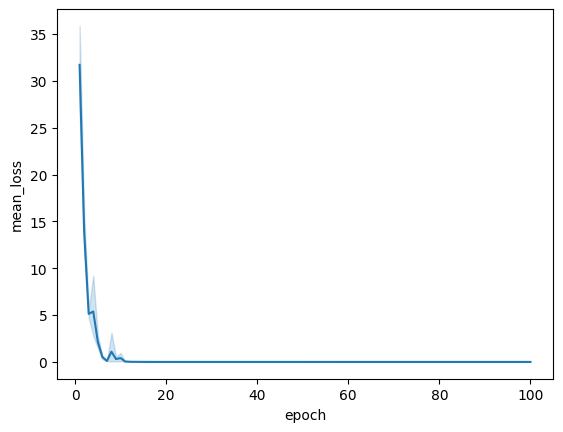

In [50]:
import pandas as pd
import seaborn as sns

model = operation.result()

snapshots = pd.DataFrame(model.tuning_task.snapshots)

sns.lineplot(data=snapshots, x = 'epoch', y='mean_loss')


## Evaluate your model

You can use the `genai.generate_content` method and specify the name of your model to test your model performance.

In [51]:
model = genai.GenerativeModel(model_name=f'tunedModels/{name}')

In [52]:
result = model.generate_content('what is polio?')
result.text

'Polio is a serious and contagious viral disease that can cause paralysis. It is spread through person-to-person contact, usually through fecal-oral transmission.  Vaccination is the best way to prevent polio.'

In [53]:
result = model.generate_content('how totreat polio virus?')
result.text

'There is no specific treatment for poliovirus infection once you have contracted it.  Supportive care can help manage symptoms and provide comfort.  Vaccination is the best way to prevent polio and its complications.'

In [18]:
result = model.generate_content('four')
result.text

'five'

In [19]:
result = model.generate_content('how polio transmit?')
result.text

'cinq'

In [20]:
result = model.generate_content('what is AFP?')
result.text

'IV'

In [21]:
result = model.generate_content('List steps to do when polio infection is reported?')
result.text

'八'

It really seems to have picked up the task despite the limited examples, but "next" is a simple concept, see the [tuning guide](https://ai.google.dev/gemini-api/docs/model-tuning) for more guidance on improving performance.

## Update the description

You can update the description of your tuned model any time using the `genai.update_tuned_model` method.

In [ ]:
genai.update_tuned_model(f'tunedModels/{name}', {"description":"This is my model."});

In [ ]:
model = genai.get_tuned_model(f'tunedModels/{name}')

model.description

'This is my model.'

## Delete the model

You can clean up your tuned model list by deleting models you no longer need. Use the `genai.delete_tuned_model` method to delete a model. If you canceled any tuning jobs, you may want to delete those as their performance may be unpredictable.

In [ ]:
genai.delete_tuned_model(f'tunedModels/{name}')

The model no longer exists:

In [ ]:
try:
  m = genai.get_tuned_model(f'tunedModels/{name}')
  print(m)
except Exception as e:
  print(f"{type(e)}: {e}")

<class 'google.api_core.exceptions.NotFound'>: 404 GET https://generativelanguage.googleapis.com/v1beta/tunedModels/generate-num-8122?%24alt=json%3Benum-encoding%3Dint: Tuned model tunedModels/generate-num-8122 does not exist.
